In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import functions as func

file = "Jan-2017 onwards.csv"
original_df = pd.read_csv(file)

filter_col = ["month", "town", "flat_type", "storey_range", "floor_area_sqm", "remaining_lease", "resale_price"]
col_filtered_df = original_df[filter_col]


In [2]:
extracted_data = col_filtered_df['remaining_lease'].str.extract(
    r'(?P<years>\d+) years(?: (?P<months>\d+) months)?'
)

# Use .fillna(0) for any rows that might not match the pattern (coerced to NaN).
years = pd.to_numeric(extracted_data['years'], errors='coerce').fillna(0).astype(int)
months = pd.to_numeric(extracted_data['months'], errors='coerce').fillna(0).astype(int)

col_filtered_df.loc[:, 'lease_months'] = (years * 12) + months
col_filtered_df = col_filtered_df.drop(columns="remaining_lease")

C:\Users\WEN YUAN\AppData\Local\Temp\ipykernel_3720\1226857134.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_filtered_df.loc[:, 'lease_months'] = (years * 12) + months


In [3]:
amk_df = col_filtered_df[col_filtered_df["town"] == "ANG MO KIO"]
clem_df = col_filtered_df[col_filtered_df["town"] == "CLEMENTI"]
bb_df = col_filtered_df[col_filtered_df["town"] == "BUKIT BATOK"]


#####################################################
#2D Linear Regression Model#
Resale price over time
Categories: 
lease_months: 50-59yrs(600-719mths), 60-69yrs(720-839mths), 70-79yrs(840-959mths), 80-89yrs(960-1079mths), 90-99yrs(1080-1188mths) 
storey_range: 01 TO 03, 04 TO 06, 07 TO 09, 10 TO 12
flat_type: 3 ROOM, 4 ROOM, 5 ROOM

In [4]:
amk_1to3_50yrs_3rm = amk_df[(amk_df["lease_months"] >= 600) & 
                        (amk_df["lease_months"] < 720) & 
                        (amk_df["storey_range"] == "01 TO 03") &
                        (amk_df["flat_type"] == "3 ROOM")]

amk_1to3_50yrs_4rm = amk_df[(amk_df["lease_months"] >= 600) & 
                        (amk_df["lease_months"] < 720) & 
                        (amk_df["storey_range"] == "01 TO 03") &
                        (amk_df["flat_type"] == "4 ROOM")]

amk_1to3_50yrs_5rm = amk_df[(amk_df["lease_months"] >= 600) & 
                        (amk_df["lease_months"] < 720) & 
                        (amk_df["storey_range"] == "01 TO 03") &
                        (amk_df["flat_type"] == "5 ROOM")]

all_4to6_50yrs_3rm = col_filtered_df[(col_filtered_df["lease_months"] >= 600) & 
                                     (col_filtered_df["lease_months"] < 720) & 
                                     (col_filtered_df["storey_range"] == "04 TO 06") &
                                     (col_filtered_df["flat_type"] == "3 ROOM")]
all_4to6_50yrs_3rm

,month,town,flat_type,storey_range,floor_area_sqm,resale_price,lease_months
7,2017-01,ANG MO KIO,3 ROOM,04 TO 06,67.0,285000.0,700
12,2017-01,ANG MO KIO,3 ROOM,04 TO 06,67.0,295000.0,716
21,2017-01,ANG MO KIO,3 ROOM,04 TO 06,73.0,321000.0,714
74,2017-01,BEDOK,3 ROOM,04 TO 06,67.0,305000.0,716
199,2017-01,BUKIT MERAH,3 ROOM,04 TO 06,65.0,295000.0,686
...,...,...,...,...,...,...,...
204971,2025-04,YISHUN,3 ROOM,04 TO 06,68.0,439888.0,715
205009,2025-03,YISHUN,3 ROOM,04 TO 06,67.0,472000.0,707
205010,2025-04,YISHUN,3 ROOM,04 TO 06,67.0,417000.0,705
205011,2025-04,YISHUN,3 ROOM,04 TO 06,82.0,480888.0,694


In [5]:
#Filter outliers
q1 = all_4to6_50yrs_3rm['resale_price'].quantile(0.25)
q3 = all_4to6_50yrs_3rm['resale_price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
all_4to6_50yrs_3rm = all_4to6_50yrs_3rm[(all_4to6_50yrs_3rm['resale_price'] > lower_bound) & (all_4to6_50yrs_3rm['resale_price'] < upper_bound)]
all_4to6_50yrs_3rm

,month,town,flat_type,storey_range,floor_area_sqm,resale_price,lease_months
7,2017-01,ANG MO KIO,3 ROOM,04 TO 06,67.0,285000.0,700
12,2017-01,ANG MO KIO,3 ROOM,04 TO 06,67.0,295000.0,716
21,2017-01,ANG MO KIO,3 ROOM,04 TO 06,73.0,321000.0,714
74,2017-01,BEDOK,3 ROOM,04 TO 06,67.0,305000.0,716
199,2017-01,BUKIT MERAH,3 ROOM,04 TO 06,65.0,295000.0,686
...,...,...,...,...,...,...,...
204971,2025-04,YISHUN,3 ROOM,04 TO 06,68.0,439888.0,715
205009,2025-03,YISHUN,3 ROOM,04 TO 06,67.0,472000.0,707
205010,2025-04,YISHUN,3 ROOM,04 TO 06,67.0,417000.0,705
205011,2025-04,YISHUN,3 ROOM,04 TO 06,82.0,480888.0,694


In [6]:
all_4to6_50yrs_3rm['month'] = pd.to_datetime(all_4to6_50yrs_3rm['month'])

# 2. Filter using the year property
# Part 1: 2017 to 2021
training_data = all_4to6_50yrs_3rm[(all_4to6_50yrs_3rm['month'].dt.year >= 2017) & (all_4to6_50yrs_3rm['month'].dt.year <= 2021)]

# Part 2: 2022 to 2025
testing_data = all_4to6_50yrs_3rm[(all_4to6_50yrs_3rm['month'].dt.year >= 2022) & (all_4to6_50yrs_3rm['month'].dt.year <= 2025)]


C:\Users\WEN YUAN\AppData\Local\Temp\ipykernel_3720\437622822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_4to6_50yrs_3rm['month'] = pd.to_datetime(all_4to6_50yrs_3rm['month'])


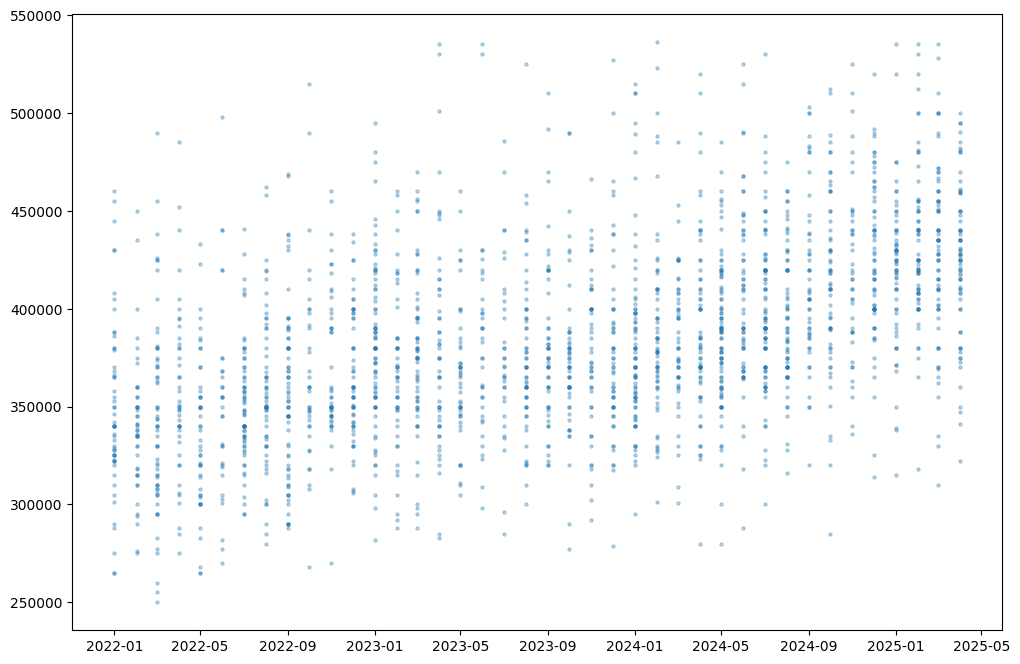

In [7]:
x = testing_data["month"]
y = testing_data["resale_price"]
plt.figure(figsize=(12, 8))
plt.scatter(x, y, alpha=0.3, s=5)
plt.show()

Example: [-0.08453272 -0.31465743], -0.48372287093134964
Example: [ 0.03912691 -0.73103371], -0.6527798836094059
Example: [-0.06452069  2.34088195], 2.211840579055734
Example: [-1.25859923  0.96820681], -1.5489916453670172
Example: [-1.14388924 -0.09405196], -2.381830451011289
Example: [0.28311457 0.03552262], 0.6017517545248504
Example: [-0.33939814 -0.58420244], -1.262998714524761
Example: [-0.78955437  1.06964564], -0.509463103487398
Example: [ 0.73398953 -0.26296913], 1.2050099313317086
Example: [ 0.45758416 -0.25791872], 0.657249602027653
Example: [ 0.22709848 -0.90689123], -0.4526942615148334
Example: [ 0.82859841 -0.66847356], 0.98872325270456
Example: [-1.19392877  1.0787528 ], -1.3091047408500398
Example: [ 1.30595284 -1.38955449], 1.2223511807521434
Example: [-1.74515707 -0.21290227], -3.703216407645554
Example: [0.44764557 0.27066346], 1.1659546017502622
Example: [-0.03303874  0.20083166], 0.13475418493080948
Example: [ 0.51328025 -0.05657844], 0.9699820558772068
Example: [-